# **(ADD THE NOTEBOOK NAME HERE)**

## Objectives

* Write your notebook objective here, for example, "Fetch data from Kaggle and save as raw data", or "engineer features for modelling"

## Inputs

* Write down which data or information you need to run the notebook 

## Outputs

* Write here which files, code or artefacts you generate by the end of the notebook 

## Additional Comments

* If you have any additional comments that don't fit in the previous bullets, please state them here. 



---

# Change working directory

* We are assuming you will store the notebooks in a subfolder, therefore when running the notebook in the editor, you will need to change the working directory

We need to change the working directory from its current folder to its parent folder
* We access the current directory with os.getcwd()

In [1]:
import os
current_dir = os.getcwd()
current_dir

'c:\\Users\\Ali\\Downloads\\from reset\\Other temps\\Code Institute\\Course\\DA\\California_Housing_Prices_Capstone\\jupyter_notebooks'

In [2]:
# Get the current working directory
current_dir = os.getcwd()
current_dir

'c:\\Users\\Ali\\Downloads\\from reset\\Other temps\\Code Institute\\Course\\DA\\California_Housing_Prices_Capstone\\jupyter_notebooks'

We want to make the parent of the current directory the new current directory
* os.path.dirname() gets the parent directory
* os.chir() defines the new current directory

In [3]:
os.chdir(os.path.dirname(current_dir))
print("You set a new current directory")

You set a new current directory


Confirm the new current directory

In [4]:
current_dir = os.getcwd()
current_dir

'c:\\Users\\Ali\\Downloads\\from reset\\Other temps\\Code Institute\\Course\\DA\\California_Housing_Prices_Capstone'

# Section 1

Section 1 content

In [5]:
import os
import glob
import zipfile
import shutil

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

import plotly.express as px
import plotly.io as pio

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, MinMaxScaler  
from sklearn.model_selection import train_test_split, cross_val_score
from feature_engine.imputation import MeanMedianImputer
from feature_engine.selection import DropFeatures

sns.set_style("whitegrid")

---

# Section 2

Section 2 content

In [6]:
current_dir = os.getcwd()
current_dir

'c:\\Users\\Ali\\Downloads\\from reset\\Other temps\\Code Institute\\Course\\DA\\California_Housing_Prices_Capstone'

In [7]:
os.chdir(os.path.dirname(current_dir))
print("You set a new current directory")
current_dir = os.getcwd()
current_dir

You set a new current directory


'c:\\Users\\Ali\\Downloads\\from reset\\Other temps\\Code Institute\\Course\\DA'

In [8]:
# Copy kaggle.json from original location to current working directory
shutil.copy("C:/Users/Ali/Downloads/from reset/Other temps/Code Institute/Course/DA/kaggle.json", os.getcwd())

SameFileError: 'C:/Users/Ali/Downloads/from reset/Other temps/Code Institute/Course/DA/kaggle.json' and 'c:\\Users\\Ali\\Downloads\\from reset\\Other temps\\Code Institute\\Course\\DA\\kaggle.json' are the same file

In [ ]:
os.environ['KAGGLE_CONFIG_DIR'] = os.getcwd()


In [ ]:
KaggleDatasetPath = "camnugent/california-housing-prices"
DestinationFolder = "inputs/datasets/raw"

In [ ]:
! kaggle datasets download -d {KaggleDatasetPath} -p {DestinationFolder}

Dataset URL: https://www.kaggle.com/datasets/camnugent/california-housing-prices
License(s): CC0-1.0




  0%|          | 0.00/400k [00:00<?, ?B/s]
100%|██████████| 400k/400k [00:00<?, ?B/s]


In [ ]:
zip_files = glob.glob(os.path.join(DestinationFolder, "*.zip"))
print(zip_files)

zip_files = glob.glob(os.path.join(DestinationFolder, "*.zip"))
print(zip_files)

for zip_file in zip_files:
    print('zip_file')
    with zipfile.ZipFile(zip_file, 'r') as zip_ref:
        zip_ref.extractall(DestinationFolder)  # Extract here
    os.remove(zip_file)  # Remove the ZIP file after extraction

print("Extraction complete.")
                     


['inputs/datasets/raw\\california-housing-prices.zip']
['inputs/datasets/raw\\california-housing-prices.zip']
zip_file
Extraction complete.


In [ ]:
df = pd.read_csv(f'{DestinationFolder}/housing.csv')
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [ ]:
df.tail()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND
20639,-121.24,39.37,16.0,2785.0,616.0,1387.0,530.0,2.3886,89400.0,INLAND


In [ ]:
df.shape

(20640, 10)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [ ]:
df.dtypes

longitude             float64
latitude              float64
housing_median_age    float64
total_rooms           float64
total_bedrooms        float64
population            float64
households            float64
median_income         float64
median_house_value    float64
ocean_proximity        object
dtype: object

In [ ]:
df.describe(include='all')

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,<1H OCEAN
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9136
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909,NaN
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874,NaN
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000,NaN
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000,NaN
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000,NaN
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000,NaN


In [ ]:
df.duplicated().sum()

0

In [ ]:
duplicates = df[df.duplicated()]
duplicates

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity


In [ ]:
# Display what unique values are in categorical column 'ocean_proximity'
df['ocean_proximity'].unique()

array(['NEAR BAY', '<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'ISLAND'],
      dtype=object)

ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: count, dtype: int64
ocean_proximity
<1H OCEAN     0.442636
INLAND        0.317393
NEAR OCEAN    0.128779
NEAR BAY      0.110950
ISLAND        0.000242
Name: proportion, dtype: float64


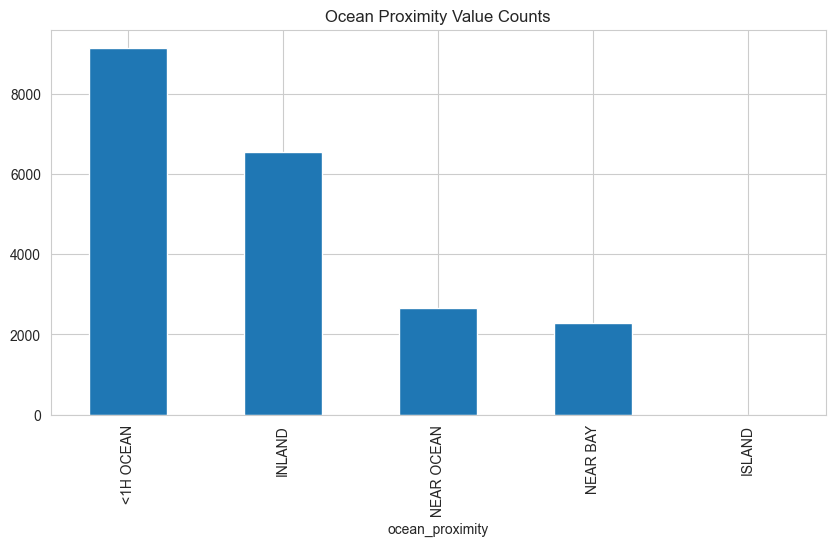

In [ ]:
#display how many unique values are in categorical column 'ocean_proximity'
print(df['ocean_proximity'].value_counts())

#display unique values are in categorical column 'ocean_proximity' as a percentage
print(df['ocean_proximity'].value_counts(normalize=True))  

# Display the value counts of 'ocean_proximity' as a bar plot
df['ocean_proximity'].value_counts().plot(kind='bar', figsize=(10, 5), title='Ocean Proximity Value Counts') 
plt.show()

In [ ]:
# checking correlation between numeric columns, method is pearson
df_numeric = df.select_dtypes(include=['number'])

# Compute the correlation matrix for the numeric columns
correlation_matrix = df_numeric.corr()

# Display the correlation matrix
correlation_matrix

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.924664,-0.108197,0.044568,0.069608,0.099773,0.055310,-0.015176,-0.045967
latitude,-0.924664,1.000000,0.011173,-0.036100,-0.066983,-0.108785,-0.071035,-0.079809,-0.144160
housing_median_age,-0.108197,0.011173,1.000000,-0.361262,-0.320451,-0.296244,-0.302916,-0.119034,0.105623
total_rooms,0.044568,-0.036100,-0.361262,1.000000,0.930380,0.857126,0.918484,0.198050,0.134153
total_bedrooms,0.069608,-0.066983,-0.320451,0.930380,1.000000,0.877747,0.979728,-0.007723,0.049686
population,0.099773,-0.108785,-0.296244,0.857126,0.877747,1.000000,0.907222,0.004834,-0.024650
households,0.055310,-0.071035,-0.302916,0.918484,0.979728,0.907222,1.000000,0.013033,0.065843
median_income,-0.015176,-0.079809,-0.119034,0.198050,-0.007723,0.004834,0.013033,1.000000,0.688075
median_house_value,-0.045967,-0.144160,0.105623,0.134153,0.049686,-0.024650,0.065843,0.688075,1.000000


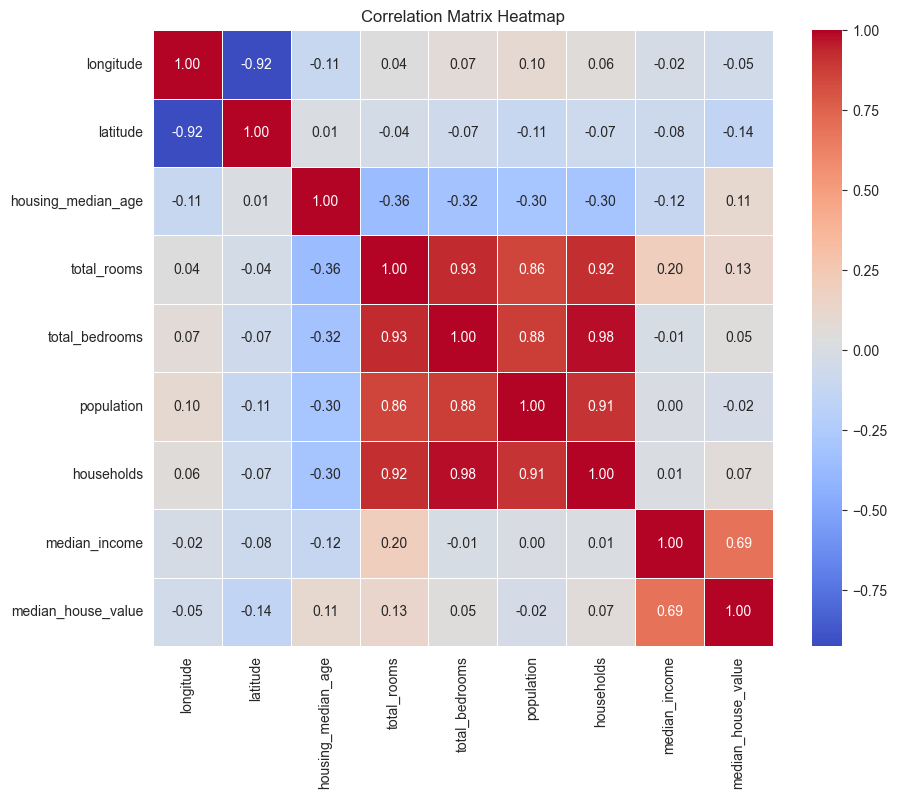

In [ ]:
#Heatmap of the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix Heatmap")
plt.show()

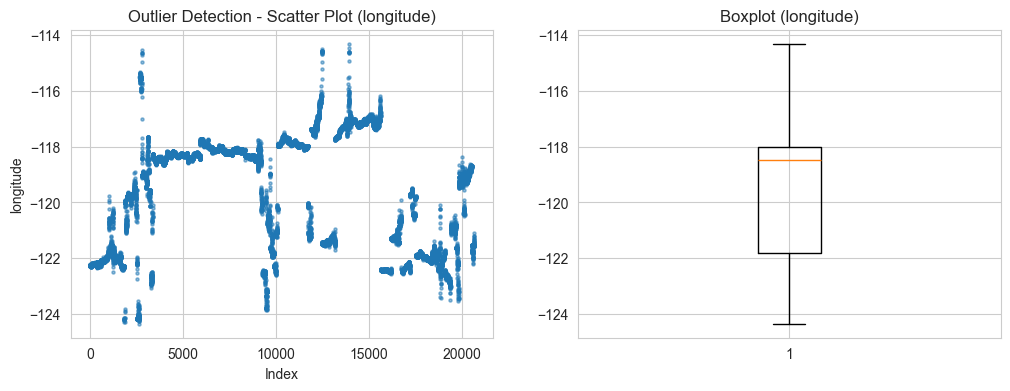

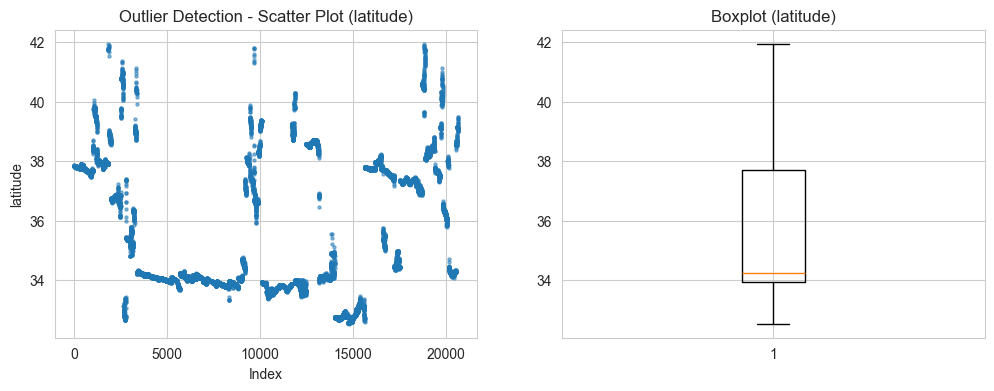

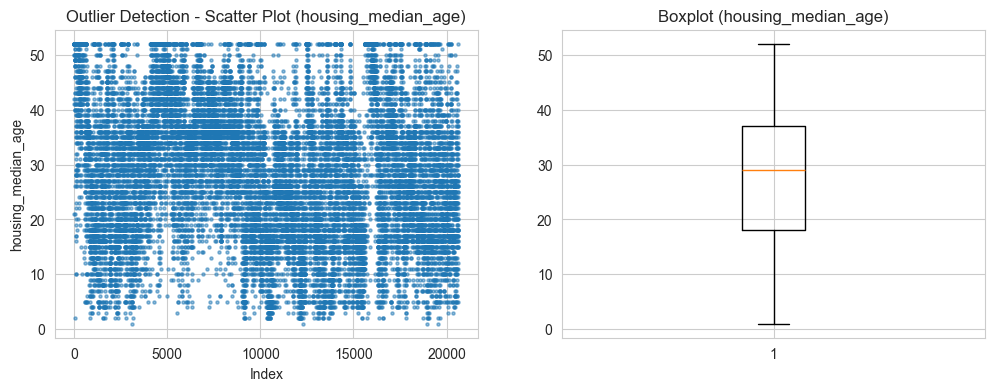

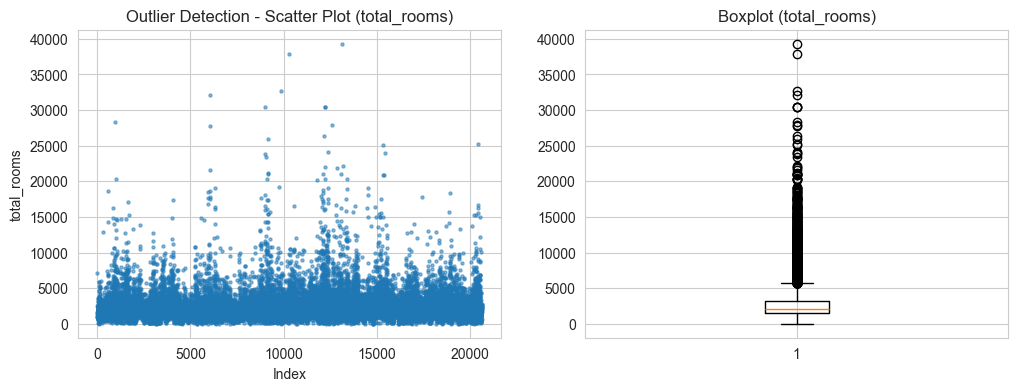

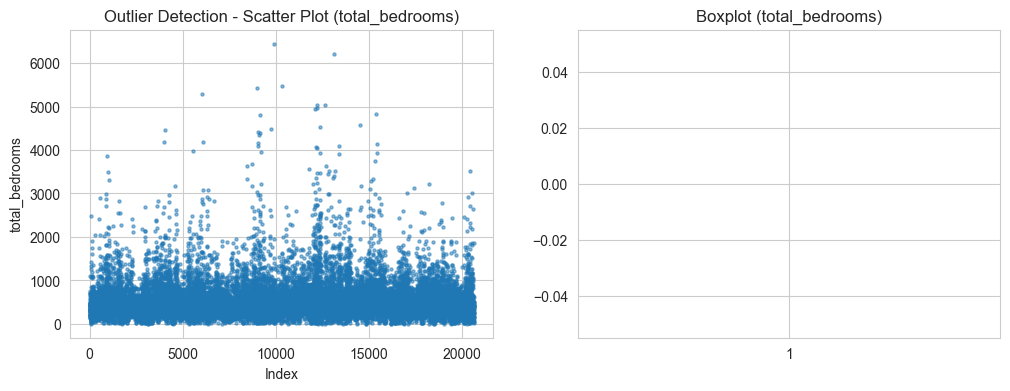

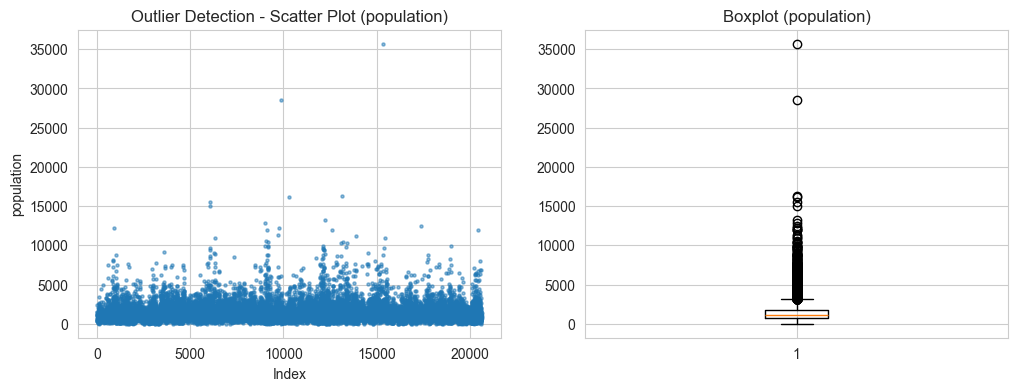

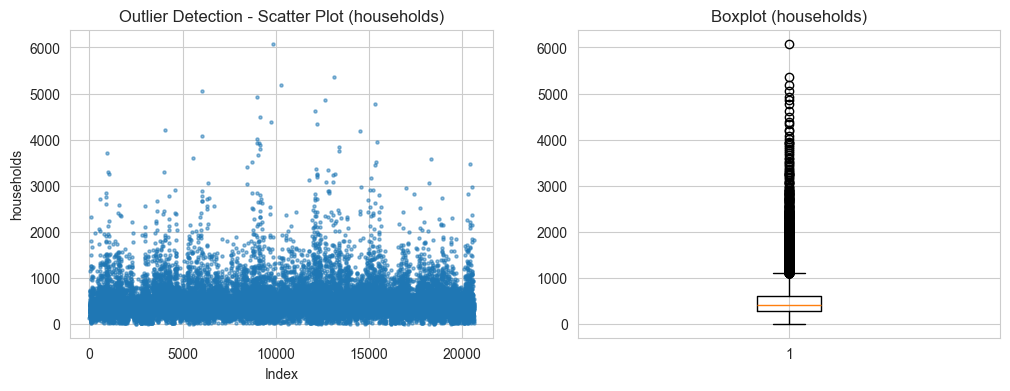

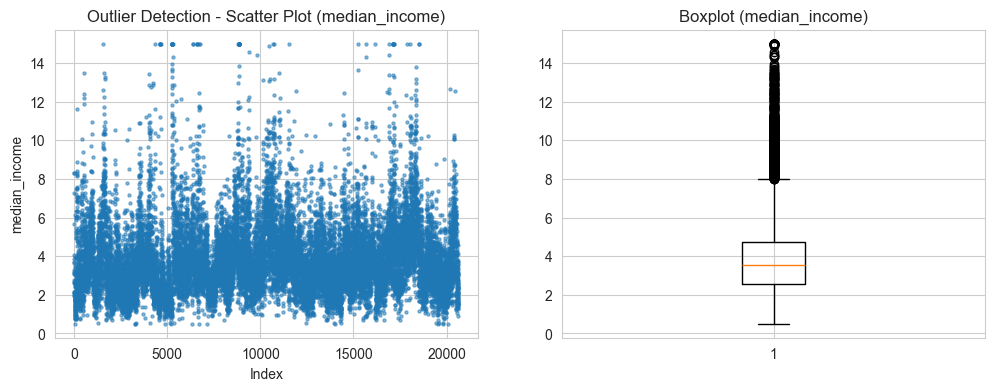

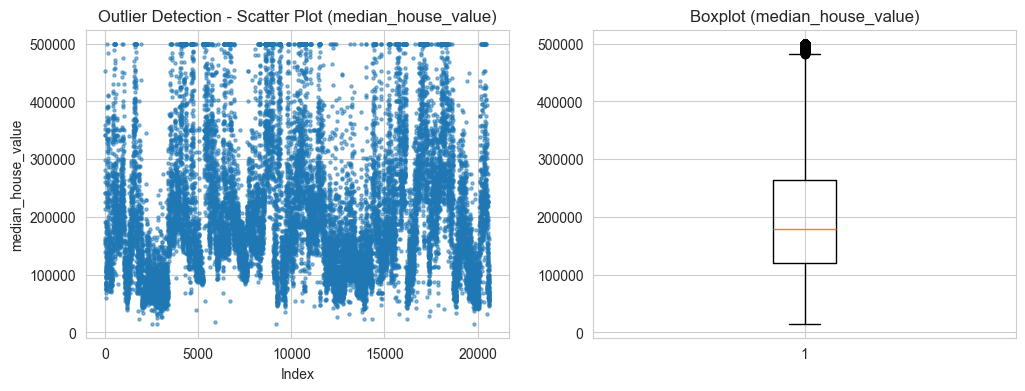

In [ ]:
# To see the outliers, loop through each numerical column and plot both scatter & boxplot side by side
for col in df.select_dtypes(include=["number"]).columns:
    fig, axes = plt.subplots(1, 2, figsize=(12, 4))  # 1 row, 2 columns layout

    # Scatter Plot
    axes[0].scatter(df.index, df[col], alpha=0.5, s=5)
    axes[0].set_xlabel("Index")
    axes[0].set_ylabel(col)
    axes[0].set_title(f"Outlier Detection - Scatter Plot ({col})")

    # Box Plot
    axes[1].boxplot(df[col])
    axes[1].set_title(f"Boxplot ({col})")

    plt.show()

In [ ]:
from ydata_profiling import ProfileReport
profile = ProfileReport(df=df, minimal=True)
profile.to_notebook_iframe()

ImportError: cannot import name 'display' from 'IPython.core.display' (c:\Users\Ali\Downloads\from reset\Other temps\Code Institute\Course\DA\California_Housing_Prices_Capstone\venv\Lib\site-packages\IPython\core\display.py)

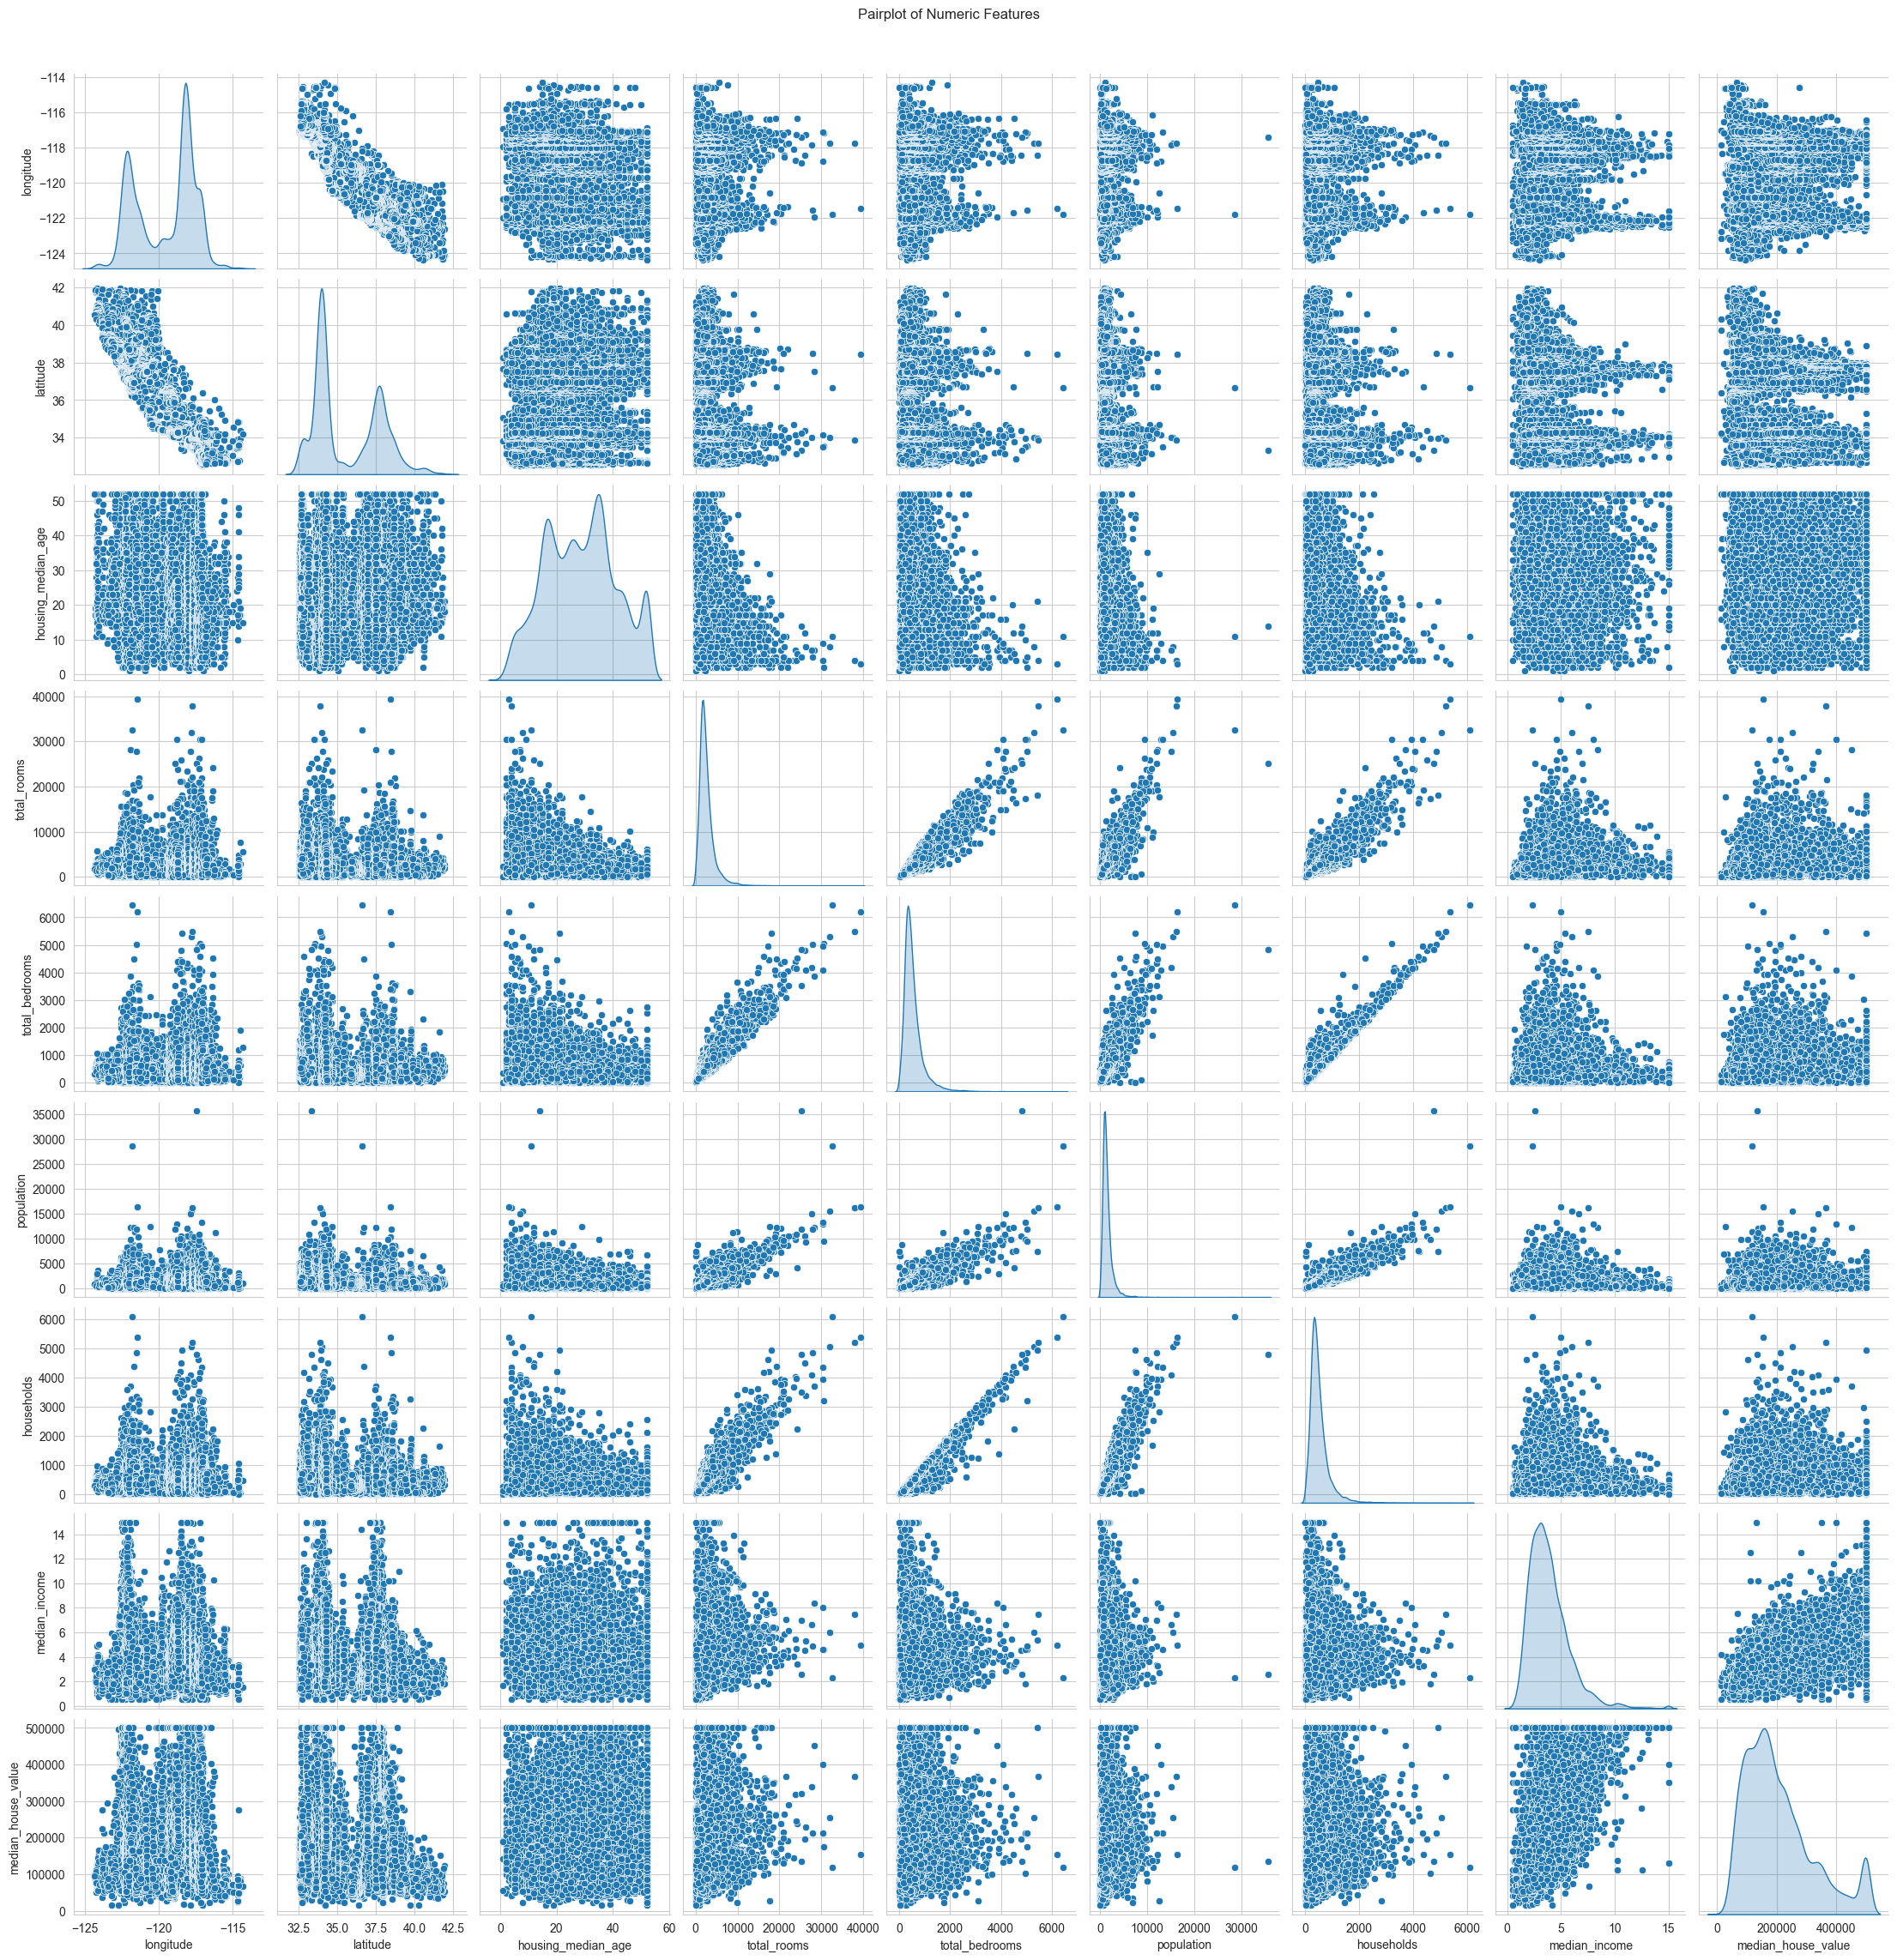

In [ ]:
sns.pairplot(df_numeric, diag_kind='kde', markers='o')
plt.suptitle("Pairplot of Numeric Features", y=1.02)    
plt.show()

---

NOTE

* You may add as many sections as you want, as long as it supports your project workflow.
* All notebook's cells should be run top-down (you can't create a dynamic wherein a given point you need to go back to a previous cell to execute some task, like go back to a previous cell and refresh a variable content)

---

# Push files to Repo

* In cases where you don't need to push files to Repo, you may replace this section with "Conclusions and Next Steps" and state your conclusions and next steps.

In [ ]:
import os
try:
  # create your folder here
  # os.makedirs(name='')
except Exception as e:
  print(e)
